<a href="https://colab.research.google.com/github/Fa20/Deep_L/blob/main/covid19_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid 19 prediction using CNN


In [2]:
# Import Library
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from glob import glob
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# version of tensorflow
tf.__version__

'2.8.0'

In [4]:
height =128
width=128
dim=(height,width)

def read_images(data):
  lst_images = []
  for i in range(len(data)):
    imag = cv2.imread(data[i]) 
    imag = cv2.resize(imag, dim)     
    lst_images.append(imag)
  return lst_images

In [5]:
data_covid = glob("/content/drive/My Drive/Covid19_Learnng-master/dataset/Covid*/*")
data_normal  = glob("/content/drive/My Drive/Covid19_Learnng-master/dataset/Normal*/*")
lst_imgs_covid  = read_images(data_covid)
lst_imgs_normal  = read_images(data_normal)

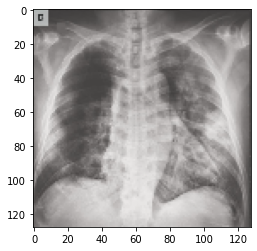

In [6]:
import matplotlib.pyplot as plt
plt.imshow(lst_imgs_covid [0])


In [7]:
labels_covid = [1] * len(lst_imgs_covid)
labels_normal  = [0] * len(lst_imgs_normal)
Y = labels_covid + labels_normal
X = lst_imgs_covid + lst_imgs_normal

In [16]:
Y[260:]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [17]:
import numpy as np
Y = np.asarray(Y)
X = np.asarray(X)
X = X.astype("float32")  
X = X / 255.0
print(X.shape)

(277, 128, 128, 3)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size= 0.20, random_state=100)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)

X_train :  (221, 128, 128, 3)   X_test :  (56, 128, 128, 3)


In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1, padding="same", activation="relu", input_shape= (128,128,3)))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Dropout(0.4))

In [20]:
model.add(keras.layers.Flatten())
layer0 = keras.layers.Dense(512, activation="relu",kernel_initializer="he_normal",  
                                kernel_regularizer=keras.regularizers.l2(0.01))
layer1 = keras.layers.Dense(128, activation="relu",kernel_initializer="he_normal",                                                                                        
                                  kernel_regularizer=keras.regularizers.l2(0.01))
layer_output = keras.layers.Dense(1, activation="sigmoid",kernel_initializer="glorot_uniform")

model.add(layer0)
model.add(keras.layers.Dropout(0.2))
model.add(layer1)
model.add(keras.layers.Dropout(0.2))
model.add(layer_output)

In [23]:
trainAug = keras.preprocessing.image.ImageDataGenerator( rotation_range=15, fill_mode="nearest")
EPOCHS = 150
BS = 32
# Compiling the model
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="binary_crossentropy", optimizer= opt, metrics=["accuracy"])

# Validation set
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, 
                                test_size= 0.20, random_state=100)
# Learning rate scheduling
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
# Interrupts training when it measures no progress on the validation set
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,  restore_best_weights=True)
# Training the model
history = model.fit_generator( trainAug.flow(X_train, y_train, batch_size=BS), steps_per_epoch=len(X_train) // BS,
                        validation_data=(X_val, y_val), validation_steps=len(y_train) // BS,epochs=EPOCHS,
                        callbacks=[lr_scheduler, early_stopping_cb])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/150
6/6 [==============================] - 23s 3s/step - loss: 0.3948 - accuracy: 0.9683 - val_loss: 0.2943 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/150
6/6 [==============================] - 19s 3s/step - loss: 0.3364 - accuracy: 0.9735 - val_loss: 0.3106 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 3/150
6/6 [==============================] - 19s 3s/step - loss: 0.3463 - accuracy: 0.9630 - val_loss: 0.3345 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 4/150
6/6 [==============================] - 19s 3s/step - loss: 0.4115 - accuracy: 0.9531 - val_loss: 0.3590 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/150
6/6 [==============================] - 19s 3s/step - loss: 0.2773 - accuracy: 0.9841 - val_loss: 0.2278 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/150
6/6 [==============================] - 19s 3s/step - loss: 0.2420 - accuracy: 0.9894 - val_loss: 0.2099 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/150
6/6 [==============================] - 18s 3s/step - loss: 0.2359 - accuracy

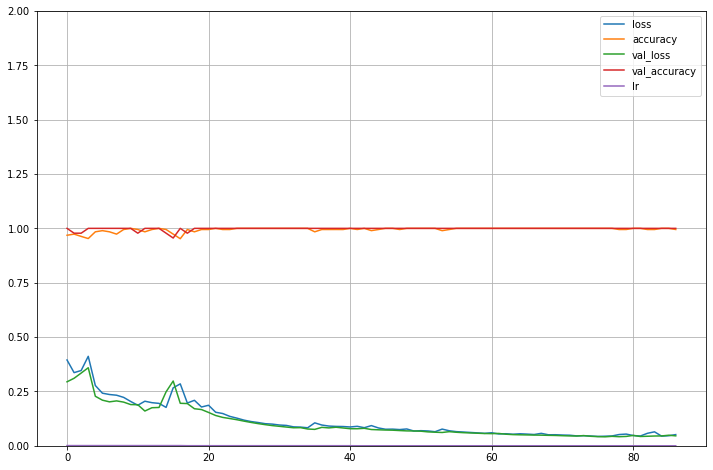

2/2 [==============================] - 1s 577ms/step - loss: 0.1085 - accuracy: 0.9821
Loss     :  0.10845792293548584
accuracy :  0.9821428656578064
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.96      1.00      0.98        26

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56

Confusion matrix : 



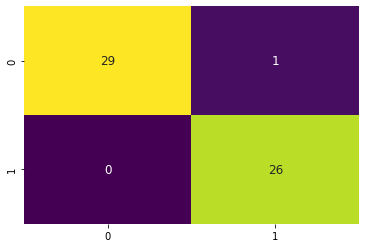

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])

# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))
# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true,preds):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds)
  print("Confusion matrix : \n")
  sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
  plt.show()
  return conf_matx
con_mat = draw_confusion_matrix(y_test, y_pred)

# Make predictions
# predicted = model.predict(X_new)

In [30]:
model.save("my_keras_model.h5")


In [31]:
model = keras.models.load_model("my_keras_model.h5")